There are various functions in `visualization.py` that allow you to quickly plot certain information. However, you may want to plot your own graphs. This tutorial demonstrates examples of how to create your own plots. 

In [16]:
import numpy as np
import astropy.units as u

from scanning import camera, coordinates, observation, visualization
import matplotlib.pyplot as plt

# Module

`visualization.plot_module` is a quick way to visualize a `Module` object and allows you to see the different default orientations, rhombuses, and wafers. 

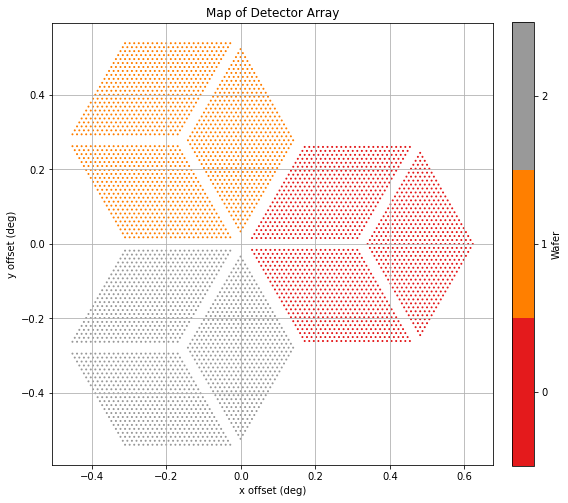

In [4]:
mod = camera.Module(freq=280)
visualization.plot_module(mod, mode='wafer')

Let's make a similar plot, but mapping the pixel's polarizations instead.

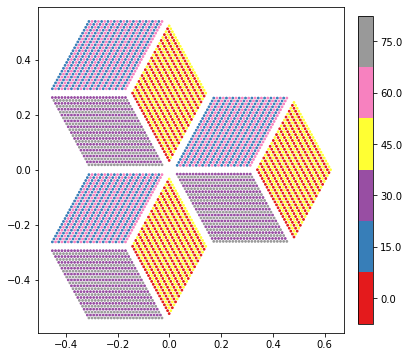

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

# the x offsets, y offsets, and polarization of each pixel in the detector arrays 
x_deg = mod.x.value
y_deg = mod.y.value
pol_deg = mod.pol.value

# get all unique polarization values
all_pol = np.unique(mod.pol.value)
num_pol = len(all_pol)

# plot the pixels and map the color of the points to the pixel's polarization
cmap = plt.cm.get_cmap('Set1', num_pol)
plot_mod = ax.scatter(x_deg, y_deg, c=pol_deg, cmap=cmap, s=3)

# color bar
cbar = plt.colorbar(plot_mod, fraction=0.046, pad=0.04)
tick_locs = (all_pol + 7.5)*(num_pol-1)/num_pol
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(all_pol)

plt.show()

# SkyPattern and TelescopePattern

In [28]:
# creating instrument
instrument = camera.PrimeCam()
instrument.add_module(mod, 'c', identifier='mod')

# creating SkyPattern
sky = coordinates.Pong(num_term=4, width=2, height=2, spacing='500 arcsec', velocity=1/2)

# creating TelescopePattern
tel = coordinates.TelescopePattern(sky, instrument, 'mod', start_ra=60, start_dec=-20, start_hrang=3)

The following are some plots of a SkyPattern and its kinematics. 

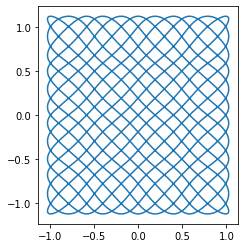

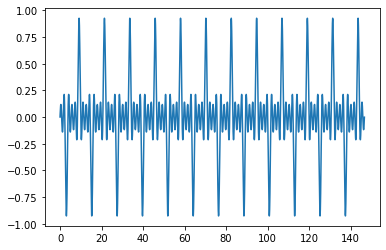

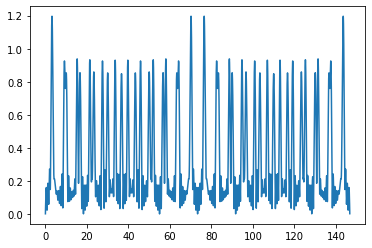

In [32]:
# path/pattern of camera
ax1 = plt.subplot()
ax1.plot(sky.x_coord.value, sky.y_coord.value)
ax1.set_aspect('equal')
plt.show()

# time vs. x acceleration
ax2 = plt.subplot()
ax2 = plt.plot(sky.time_offset.value, sky.x_acc.value)
plt.show()

# time vs. total accleration
ax3 = plt.subplot()
ax3 = plt.plot(sky.time_offset.value, sky.acc.value)
plt.show()

The following are some plots of the **boresight** of a `TelescopePattern` and its kinematics. 

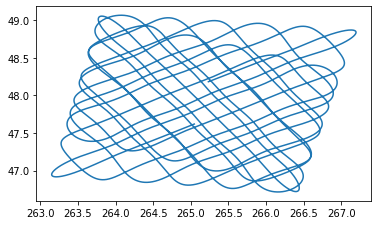

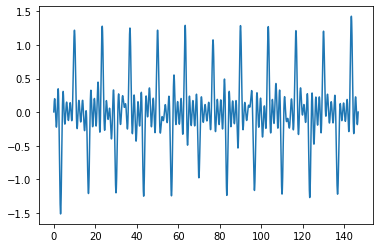

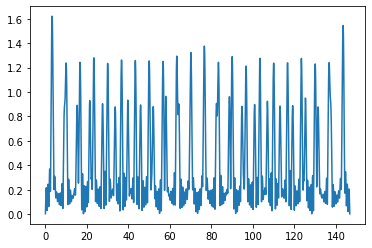

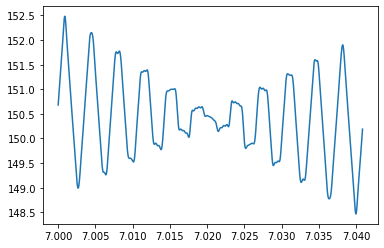

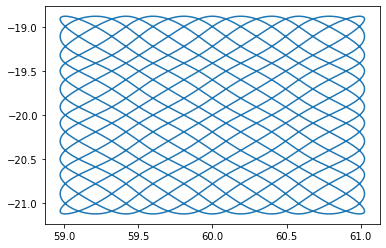

In [36]:
# path/pattern of camera
ax1 = plt.subplot()
ax1.plot(tel.az_coord.value, tel.alt_coord.value)
ax1.set_aspect('equal')
plt.show()

# time vs. x acceleration
ax2 = plt.subplot()
ax2 = plt.plot(tel.time_offset.value, tel.az_acc.value)
plt.show()

# time vs. total accleration
ax3 = plt.subplot()
ax3 = plt.plot(tel.time_offset.value, tel.acc.value)
plt.show()

# lst vs. field rotation 
ax4 = plt.subplot()
ax4 = plt.plot(tel.lst.value, tel.rot_angle.value)
plt.show()

# ra/dec coordinates
ax5 = plt.subplot()
ax5 = plt.plot(tel.ra_coord, tel.dec_coord)
plt.show()

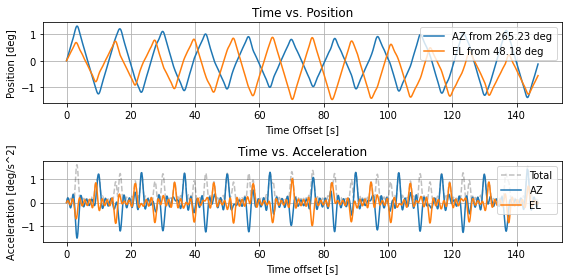

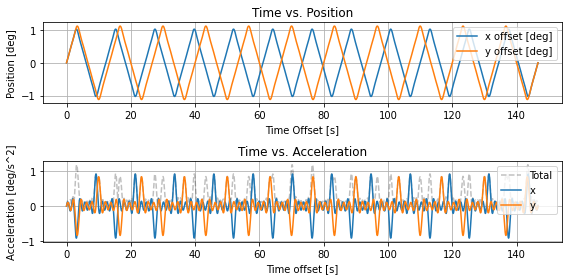

In [37]:
# a pre-defined function
visualization.telescope_kinematics(tel, plots=['coord', 'acc'])

# Saving Plots

All plotting functions in `visualization.py` has a `path` and `show_plot` parameter, which is by default `None` and `True` respectively. Passing a file path to `path` saves it to that location.

Saved to sky_kinematics.png.


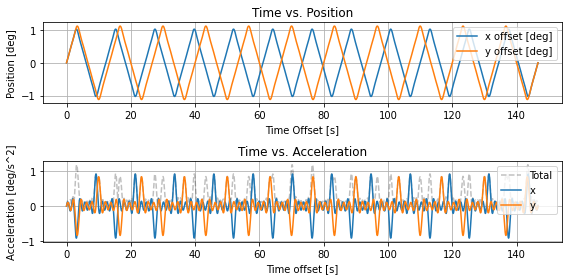

In [38]:
visualization.sky_kinematics(tel, plots=['coord', 'acc'], path='sky_kinematics.png', show_plot=True)